This is a project where I try to classify medal recipients vs non-recipients. This focuses on the women's tennis Olymics participants.

In [357]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [358]:
df = pd.read_csv('athlete_events.csv')

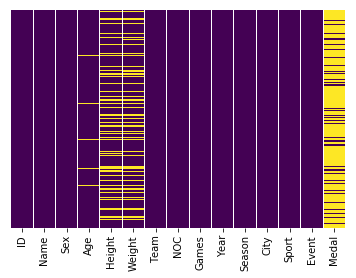

In [459]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis',  yticklabels = False)

The following heatmap shows where data is missing for the entire dataset, which includes all sports and genders. 

In [460]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [511]:
#Selecting data for the women's tennis team
female_tennis = df[(df['Sport'] == 'Tennis') & (df['Sex'] == 'F')]

In [512]:
#Observing null data
female_tennis.isnull().sum()

ID           0
Name         0
Sex          0
Age         29
Height     207
Weight     214
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal     1038
dtype: int64

C:\Users\csmid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


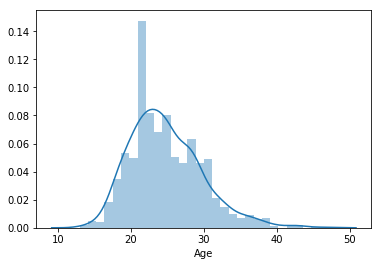

In [513]:
#Age distribution 
sns.distplot(female_tennis['Age'].dropna(), bins = 30)

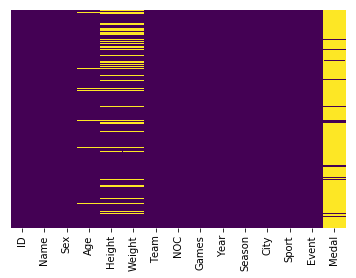

In [514]:
sns.heatmap(female_tennis.isnull(), cbar = False, cmap = 'viridis',  yticklabels = False)

Data is missing for all three predictors, and for the responce. I will assume missing data for the responce indicates a lack of recieving a medal. I will try to imply values for the missing predictor data.

In [515]:
#140 medal winners
female_tennis.count()

ID        1178
Name      1178
Sex       1178
Age       1149
Height     971
Weight     964
Team      1178
NOC       1178
Games     1178
Year      1178
Season    1178
City      1178
Sport     1178
Event     1178
Medal      140
dtype: int64

In [516]:
female_tennis.describe()

,ID,Age,Height,Weight,Year
count,1178.000000,1149.000000,971.000000,964.000000,1178.000000
mean,72839.440577,24.775457,172.335736,62.094398,1989.261460
std,39494.245824,4.933713,6.572871,6.027318,32.764984
min,975.000000,13.000000,150.000000,48.000000,1900.000000
25%,37885.000000,21.000000,168.000000,58.000000,1992.000000
50%,75706.000000,24.000000,172.000000,61.000000,2000.000000
75%,107080.250000,28.000000,176.000000,65.000000,2008.000000
max,135508.000000,47.000000,191.000000,85.000000,2016.000000


In [517]:
#Checking where there is missing data for medal winners
female_tennis[(female_tennis['Weight'].isnull()) & (female_tennis['Medal'].dropna())
              & (female_tennis['Height'].isnull())].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1756 to 261701
Data columns (total 15 columns):
ID        55 non-null int64
Name      55 non-null object
Sex       55 non-null object
Age       49 non-null float64
Height    0 non-null float64
Weight    0 non-null float64
Team      55 non-null object
NOC       55 non-null object
Games     55 non-null object
Year      55 non-null int64
Season    55 non-null object
City      55 non-null object
Sport     55 non-null object
Event     55 non-null object
Medal     55 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 6.9+ KB


In [518]:
#changes medal values to 1 or 0 
def medal_change(x):
    if pd.isnull(x) == True:
        return 0
    else:
        return 1
        
    

In [519]:
female_tennis['Medal'] = female_tennis['Medal'].apply(lambda x: medal_change(x))


C:\Users\csmid\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


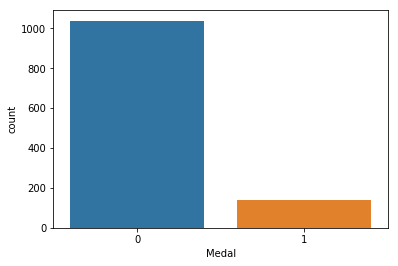

In [520]:
sns.countplot(x = female_tennis['Medal'])

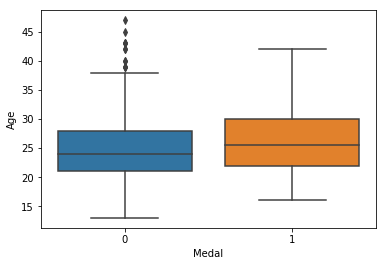

In [521]:
sns.boxplot(x = female_tennis['Medal'], y = female_tennis['Age'])

Here, I see the median age for medalists is greater than that of the non-medalists. I will insert median age of the medalists for medalits missing their age, and do the same for non-medalists

In [522]:
#change the ages of medalists and non-medalists
def age_modify(col):
    Age = col[0]
    medal = col[1]
    
    if pd.isnull(Age) == True:
        if medal == 0:
            return 24
        else:
            return 25.5
    else:
        return Age


In [523]:
female_tennis['Age'] = female_tennis[['Age', 'Medal']].apply(age_modify, axis = 1)

C:\Users\csmid\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


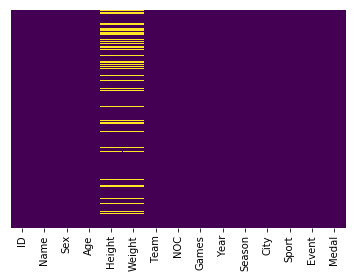

In [524]:
sns.heatmap(female_tennis.isnull(), cbar = False, cmap = 'viridis',  yticklabels = False)

This confirms that there is data filled in for the "medal" column and the "age" column

In [525]:
#EDA on medalists
medalists = female_tennis[female_tennis['Medal'] == 1]

C:\Users\csmid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


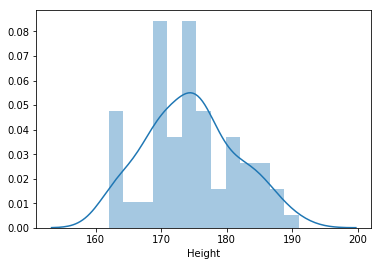

In [526]:
#Height distribution of medalists
sns.distplot(medalists['Height'].dropna(), bins = 13)

The hight distribution for the medalists seems roughly normal. This gives me an idea on how to fix the missing information.

C:\Users\csmid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


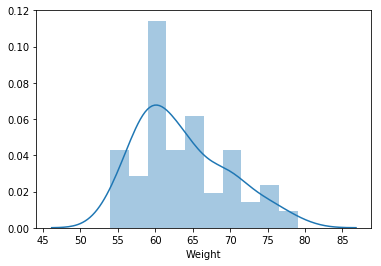

In [527]:
#weight distribution of medalists
sns.distplot(medalists['Weight'].dropna(), bins = 10)

The weight distribution for the medalists also seems skewed right, but I will assume it is normal.

In [528]:
nonmedalists = female_tennis[female_tennis['Medal'] == 0]

C:\Users\csmid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


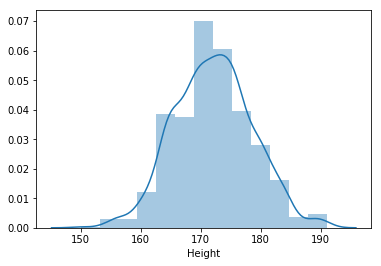

In [529]:
sns.distplot(nonmedalists['Height'].dropna(), bins = 13)

The hight distribution of non-medalists looks normal.

C:\Users\csmid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


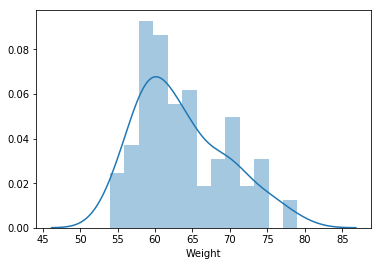

In [530]:
sns.distplot(medalists['Weight'].dropna(), bins = 13)

The weight distribtion seems skewed right for the non-medalists, but I will assume it is normal. In order to fill in the missing data, I will take a random sample from the height and weight distributions of the medalists and the non-medalists.

In [531]:
from numpy.random import normal

In [532]:
#using means and std from heights and averages for the normal distribution
medalists['Height'].describe()

count     85.000000
mean     174.529412
std        6.835809
min      162.000000
25%      170.000000
50%      175.000000
75%      179.000000
max      191.000000
Name: Height, dtype: float64

The hight distribution for the medalists will be centered around the mean, 174.52, and the have a standard deviation of 6.835.

In [533]:
nonmedalists['Height'].describe()

count    886.000000
mean     172.125282
std        6.512317
min      150.000000
25%      168.000000
50%      172.000000
75%      176.000000
max      191.000000
Name: Height, dtype: float64

The hight distribution for the non-medalists will be centered around the mean, 172.12, and the have a standard deviation of 6.51.

In [536]:
#function fills in the missing data for height
def normalize_height(col):
    height = col[0]
    medal = col[1]
    
    if pd.isnull(height) == True:
        if medal == 1:
            height = int(normal(loc = 174.5294, scale =6.835, size = 1 ))
            return int(height)
        else:
            height = int(normal(loc = 172.1252, scale =6.5123, size = 1))
            return int(height)        
    else:
        return int(height)

In [537]:
female_tennis['Height'] = female_tennis[['Height', 'Medal']].apply(normalize_height, axis = 1)

C:\Users\csmid\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


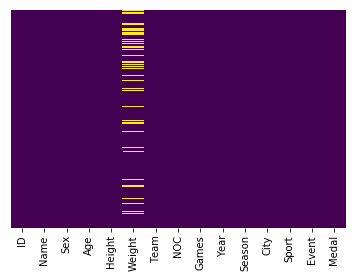

In [484]:
#confirmation that data was filled
sns.heatmap(female_tennis.isnull(), cbar = False, cmap = 'viridis',  yticklabels = False)

Here is the results of the metrics of the height distribution before and after the transformation. The results are similar, so
I conclude that the data cleansing was effective

In [498]:
female_tennis[female_tennis['Medal'] == 1]['Height'].describe()

count    140.000000
mean     174.464286
std        6.777460
min      156.000000
25%      169.000000
50%      175.000000
75%      180.000000
max      191.000000
Name: Height, dtype: float64

In [499]:
female_tennis[female_tennis['Medal'] == 0]['Height'].describe()

count    1038.000000
mean      171.996146
std         6.469123
min       150.000000
25%       167.000000
50%       172.000000
75%       176.000000
max       191.000000
Name: Height, dtype: float64

The mean heights and standard deviations of the heights of medalists and non-medalists did not change much. For medalists, the mean decreases from 174.52 to 174.46, or .03%. For the non-medalists, the mean decreases from 172.12 to 171.99, or .07%. A larger percent decrease for the mean heights' non-medalists is good, because the data leads me to believe that being taller is a positive predictor of a medalist.

In [424]:
medalists['Weight'].describe()

count    84.000000
mean     63.511905
std       5.962724
min      54.000000
25%      59.000000
50%      63.000000
75%      68.000000
max      79.000000
Name: Weight, dtype: float64

In [425]:
nonmedalists['Weight'].describe()

count    880.000000
mean      61.959091
std        6.019359
min       48.000000
25%       58.000000
50%       61.000000
75%       65.000000
max       85.000000
Name: Weight, dtype: float64

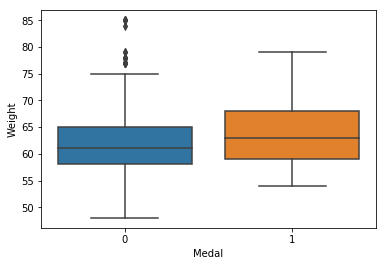

In [426]:
sns.boxplot(x = 'Medal', y = 'Weight', data = female_tennis)

In [427]:
def normalize_weight(col):
    weight = col[0]
    medal = col[1]
    
    if pd.isnull(weight) == True:
        if medal == 1:
            weight = int(normal(loc = 63.5119, scale = 5.96272, size = 1 ))
            return int(weight)
        else:
            weight = int(normal(loc = 61.9590, scale =6.01935, size = 1))
            return int(weight)        
    else:
        return int(weight)

Here, I am using the same line of logic for the weights as I did the heights.

In [538]:
female_tennis['Weight'] = female_tennis[['Weight', 'Medal']].apply(normalize_weight, axis = 1)

C:\Users\csmid\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


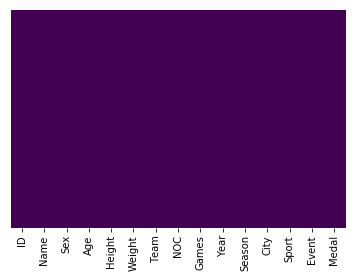

In [540]:
#verifying the data is filled
sns.heatmap(female_tennis.isnull(), cbar = False, cmap = 'viridis',  yticklabels = False)

In [542]:
female_tennis[female_tennis['Medal'] == 1]['Weight'].describe()

count    140.000000
mean      63.050000
std        6.175287
min       50.000000
25%       59.000000
50%       62.000000
75%       67.250000
max       84.000000
Name: Weight, dtype: float64

In [543]:
female_tennis[female_tennis['Medal'] == 0]['Weight'].describe()

count    1038.000000
mean       61.929672
std         6.036362
min        42.000000
25%        58.000000
50%        61.000000
75%        65.000000
max        85.000000
Name: Weight, dtype: float64

For the medalists, the mean weight decreases from 63.511 to 63.05, or .72%. For nonmedalists, the mean weight decreases 61.959 to 61.929, or .048%. The medalists see a more significant decrease in weight which is not a good thing. This makes me rethink the idea of taking a random sample from a normal distribution. I will continue with the current state of the data, but take note that this part of the data cleaning may be erroneous.

In [449]:
from sklearn.model_selection import train_test_split
X = female_tennis[['Age', 'Height', 'Weight']]
y = female_tennis['Medal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 101)

In [450]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

In [451]:
from sklearn.metrics import classification_report, confusion_matrix


In [452]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.83      1.00      0.91        98
          1       0.00      0.00      0.00        20

avg / total       0.69      0.83      0.75       118



C:\Users\csmid\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [453]:
print(confusion_matrix(y_test, predictions))

[[98  0]
 [20  0]]


The model fails to predict any medalists. I need to rethink how to clean the data in order to fix this issue. I will start with improving the process in which I cleaned the weight.